# packages

In [1]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")
install("numpy")
install("matplotlib")

In [2]:
figwidth = 12
figheight = 8
barlabelsize = 18
fig_color = "0.8"

# imports

In [2]:
import pandas as pd
import numpy as np
import json
import csv
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from textwrap import wrap


In [3]:
params = {'legend.fontsize': 'x-large',
        'axes.labelsize':'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large',
        'font.size': 13}
for key in params:
        plt.rcParams[key] = params[key]

# Config

In [12]:
destination_folder = './target/img/'
fileformat = ".pdf"
input_json = "./target/json/data_consolidated_semistructured.json"

figwidth = 12
figheight = 8
barlabelsize = 18
fig_color = "0.8"

# Read data variable from csv

In [4]:
df = pd.read_csv(filepath_or_buffer="./data/04 extraction consolidation results.csv", sep="|")
result = df['Title'].to_list()
result = list(dict.fromkeys(result))
titles = list(df.columns)
metadata = pd.read_csv("./data/search_results.csv", sep=";", encoding="latin-1")
metadata = metadata.drop_duplicates(subset=['Title'])
data = df.merge(metadata, how='left', on='Title')
yeardata = data.drop_duplicates('Title')
yeardata = yeardata[yeardata['Title'].notna()]
yeardata = yeardata.reset_index()

del metadata
del df
del titles

In [5]:
df2 = pd.read_csv("./data/04 extraction consolidation results.csv", sep="|")

In [6]:
yearless = {'A digital twin-driven hybrid approach for the prediction of performance degradation in transmission unit of CNC machine tool':2022,
'A framework for Model-Driven Engineering of resilient software-controlled systems':2021,
'A framework for Model-Driven Engineering of resilient software-controlled systems':2021,
'A Methodology for Digital Twin Modeling and Deployment for Industry 4.0':2020,
'AML4DT: A Model-Driven Framework for Developing and Maintaining Digital Twins with AutomationML':2021,
'Closed-Loop Systems Engineering (CLOSE): Integrating Experimentable Digital Twins with the Model-Driven Engineering Process':2018,
'Combining Low-Code Programming and SDL-Based Modeling with Snap! in the Industry 4.0 Context':2021,
'DataTime: a Framework to smoothly Integrate Past, Present and Future into Models':2021,
'Digital Behavioral Twins for Safe Connected Cars':2018,
'Digital Twin of an Electrical Motor Based on Empirical Performance Model':2020,
'Ensuring consistency in scalable-detail models for DT-based control':2021,
'Generating customized low-code development platforms for digital twins':2022,
'Generative and Model-driven SDK development for the Industrie 4.0 Digital Twin':2021,
'Interface Development for Digital Twin of an Electric Motor Based on Empirical Performance Model':2022,
'Knowledge driven rapid development of white box digital twins for industrial plant systems':2021,
'Meta-model-based shop-floor digital twin architecture, modeling and application':2023,
'Model-Driven Development of a Digital Twin for Injection Molding':2020,
'Model-driven engineering city spaces via bidirectional model transformations':2021,
'Supporting Digital Twins for the Retrofit in Aviation by a Model-Driven Data Handling':2023,
'Supporting the Implementation of Digital Twins for IoT-Enhanced BPs':2023,
'The Framework for Designing Autonomous Cyber-Physical Multi-agent Systems for Adaptive Resource Management':2019,
'The OMiLAB Digital Innovation environment: Agile conceptual models to bridge business value with Digital and Physical Twins for Product-Service Systems development':2022,
'Towards a Model-Driven Architecture for Interactive Digital Twin Cockpits':2020,
'Using UML and OCL Models to Realize High-Level Digital Twins':2021,

'Towards Generating Model-Driven Speech Interfaces for Digital Twins':2023,
'Survey and Practice on Architecture and Deployment Method of Digital Twin System for Intelligent Substation':2023,
'Supporting the Development of Digital Twins in Nuclear Waste Monitoring Systems':2023,
'Supporting Digital Twins Systems Integrating the MERODE Approach':2023,
'Modeling Urban Digital Twins over the Cloud-to-Thing Continuum':2023,
'Model-based digital twins of medicine dispensers for healthcare IoT applications':2023,
'Generation of Digital Twins for Information Exchange Between Partners in the Industrie 4.0 Value Chain':2023,
'Extracting Hardware Reconfiguration Models based on Knowledge Synthesis from STEP Files':2023,
'Explaining Cyberphysical System Behavior With Digital Twins':2023,
'Empowering Industry 4.0 with Generative and Model-Driven SDK Development':2023,
'Digital twin model-driven capacity evaluation and scheduling optimization for ship welding production line':2023,
'An enhanced state-aware model learning approach for security analysis in lightweight protocol implementations':2023,
'AC-ROS: Assurance case driven adaptation for the robot operating system':2020,
'A Modeling Approach Supporting Digital Twin Engineering: Optimizing the Energy Consumption of Air Conditioning Facilities':2023,
'A Model-Driven Digital Twin for Manufacturing Process Adaptation':2023,
'A Model Based Framework for IoT-Aware Business Process Management':2023

}

In [7]:
for index, row in yeardata.iterrows():
    if pd.isna(row['Publication Year']):

        print()
    if row['Title'] in yearless.keys():
        if pd.isna(row['Publication Year']):
            yeardata.at[index, 'Publication Year'] = yearless[row['Title']]
    else:
        if pd.notna(row['Title']) and pd.isna(row['Publication Year']):
            print(row['Title'])


In [8]:
data.columns

Index(['ID', 'Title', 'model processing technique', 'source',
       'source category', 'source sub-category 1', 'source sub-category 2',
       'source model target category', 'target', 'target category',
       'target sub-category 1', 'target sub-category 2',
       'target model target category', 'Technological Readiness Level',
       'system lifecycle phase', 'twinning target', 'twin lifecycle phase',
       'use case domain', 'Use Case', 'Publication Title', 'Authors',
       'Publication Year', 'Document Identifier', 'Publisher'],
      dtype='object')

In [9]:
data = data[data['Title'].notna()]

data.head()

# Barcharts for each RQ

5    2018
4    2019
3    2020
2    2021
1    2022
0    2023
Name: entry, dtype: object : 5     2
4     2
3     9
2    12
1    17
0    21
Name: count, dtype: int64


C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_7244\835670135.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([0,2018,2019,2020,2021,2022,2023], rotation=90)


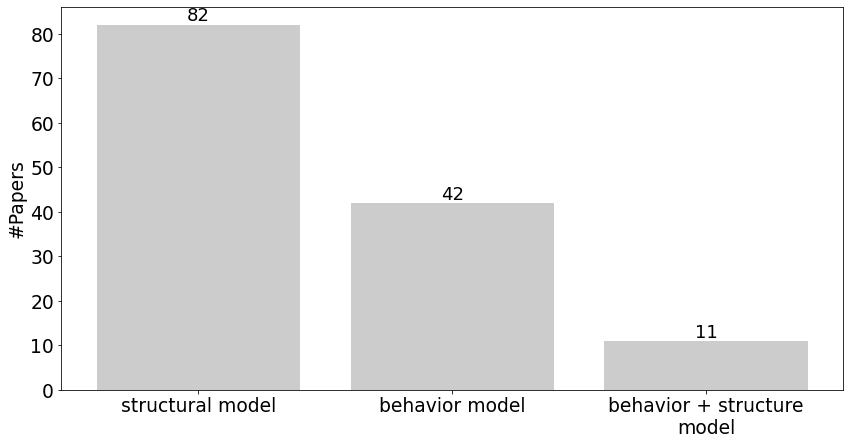

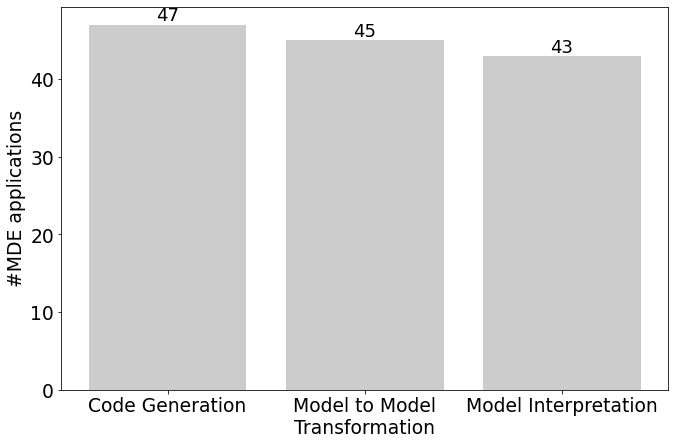

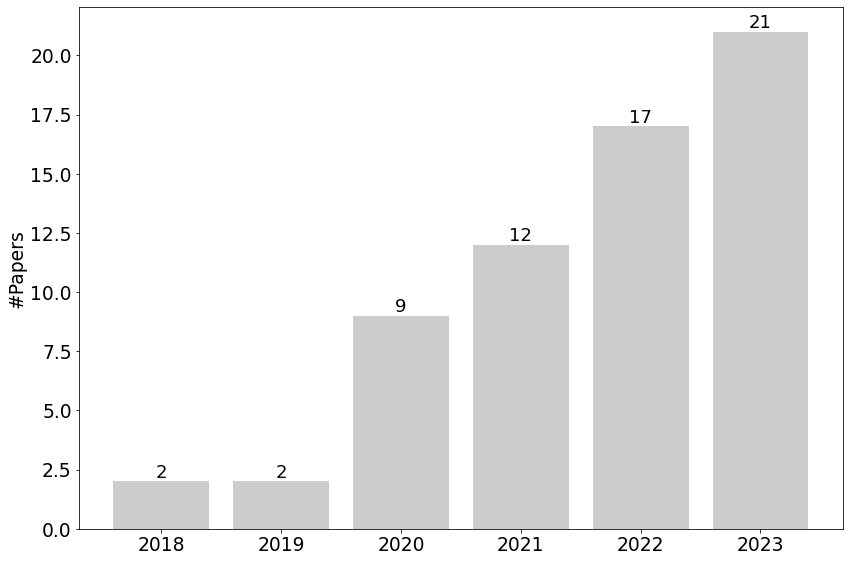

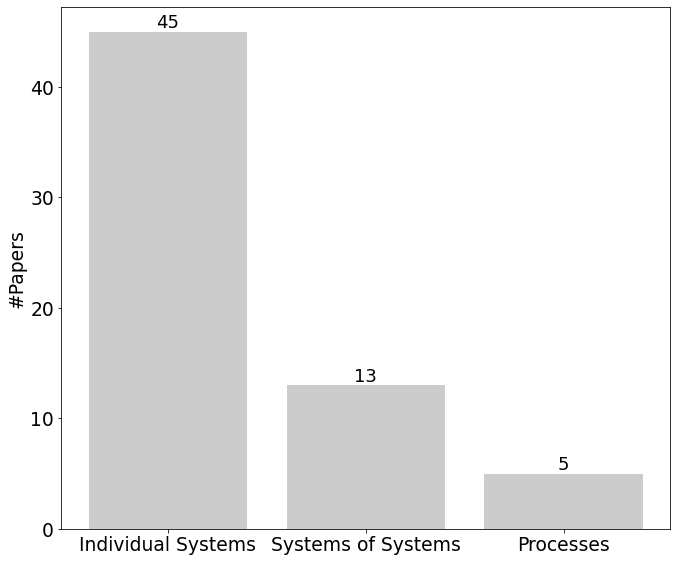

In [13]:
modeling_language = data["source category"].value_counts().reset_index()
modeling_language.columns = ['entry', 'count']
modeling_language  = modeling_language[modeling_language['count'] > 1]
mde_technique= data["model processing technique"].value_counts().reset_index()
mde_technique.columns = ['entry', 'count']
use_case_domain = data["use case domain"].value_counts().reset_index()
use_case_domain.columns = ['entry', 'count']
system_lcp = data["system lifecycle phase"].value_counts().reset_index()
system_lcp.columns = ['entry', 'count']
twinning_target = data["twinning target"].value_counts().reset_index()
twinning_target.columns = ['entry', 'count']
twin_lcp= data["twin lifecycle phase"].value_counts().reset_index()
twin_lcp.columns = ['entry', 'count']
trl = data["Technological Readiness Level"].value_counts().reset_index()
trl.columns = ['entry', 'count']


yeardata = yeardata.fillna(value={'Publication Year':"0"})
years = yeardata["Publication Year"].value_counts().reset_index()
years.columns = ['entry', 'count']
years['entry'] = years['entry'].astype(int).astype(str)
years['entry'].replace('0', "NAN")

tt = data["twinning target"].value_counts().reset_index()
tt.columns = ['entry', 'count']

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight*0.8)
# List of DataFrames
dataframes = [modeling_language, mde_technique, years, tt]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Modeling Language', '#Papers per MDE technique', '#Papers per year', '#Papers per twinning target']

# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[0])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_Lang_barchart"+ fileformat)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figheight*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[1])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#MDE applications")
#plt.show()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_barchart"+ fileformat)


fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[2]
plot_data.sort_values('entry', inplace=True)
for index, row in plot_data.iterrows():
    val = int(row['entry'])
    cou = row['count']
#    if val < 2023:
    axes.bar(val, cou,color=fig_color)
#    else:
#        axes.bar(val, cou, fill=False, hatch='///')

#fill=False, hatch='///'

  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
print(plot_data['entry'], ":", plot_data['count'])
axes.set_ylabel("#Papers")
#axes.set_title(titles[2])
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels([0,2018,2019,2020,2021,2022,2023], rotation=90)
for container in axes.containers:
    axes.bar_label(container, fontsize=barlabelsize)


# Adjust the layout to avoid overlapping titles
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"Year_barchart"+ fileformat)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figheight)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[3]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[3])
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"TT_barchart"+ fileformat)


In [14]:
# List of DataFrames
dataframes = [use_case_domain, system_lcp, twinning_target, twin_lcp, trl]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Use Case Domain', '#Papers per System LCP', '#Papers per Twinning Target', '#Papers per Twin LCP', '#Papers per TRL']


In [15]:
import re

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_7244\780208155.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


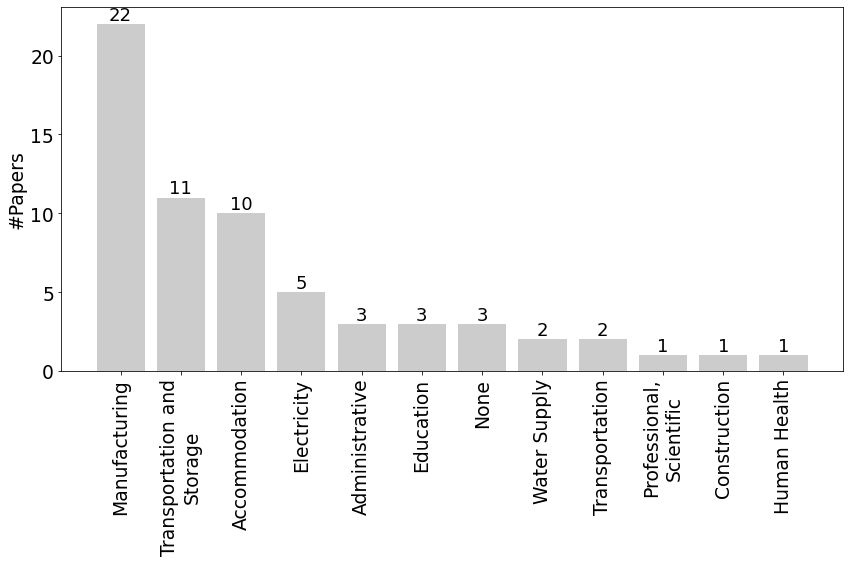

In [16]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
plot_data = dataframes[0]

entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.bar(entry_data, plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[0])
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.tight_layout()
plt.savefig(destination_folder+"domain_barchart"+ fileformat)

As-Designed
As-Operated


C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_7244\3983728193.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=0)


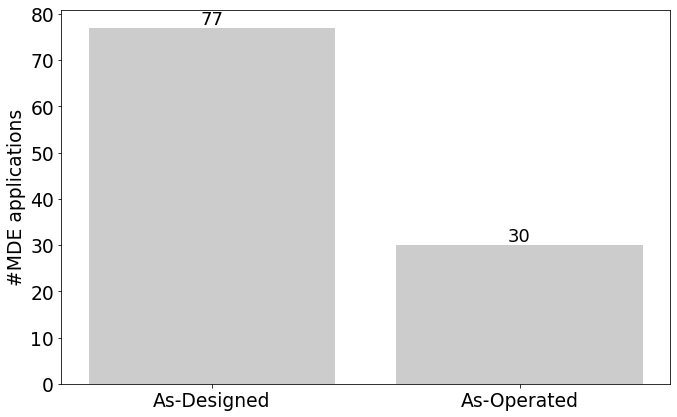

In [17]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.5)
plot_data = dataframes[3]#.groupby(['entry']).filter(lambda x: len(x)>1)

for index, row in plot_data.iterrows():
    if ";" in row['entry']:
        values = row['entry'].split(";")
        for val in values:
            for index2, row2 in plot_data.iterrows():
                if row2['entry'] == val:
                    #change value by +1
                    print(row2['entry'])
                    plot_data.loc[plot_data['entry'].isin([row2['entry']]), 'count']+=1
        plot_data.drop(index, inplace=True)

axes.bar(plot_data['entry'], plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[3])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=0)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#MDE applications")
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_barchart"+ fileformat)

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_7244\460116121.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=0)


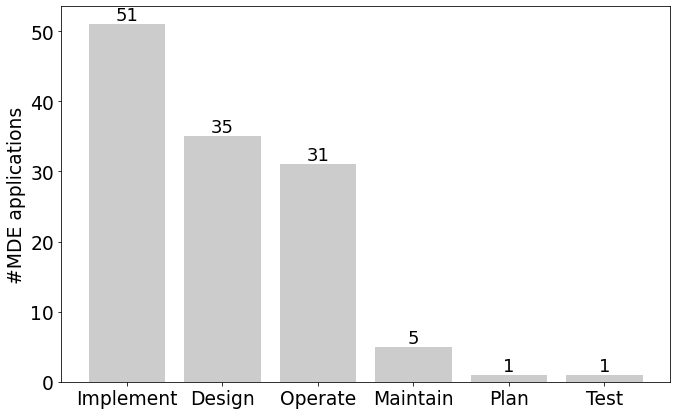

In [18]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.5)
plot_data = dataframes[1]
plot_data = plot_data#[plot_data['count'] > 2] 
axes.bar(plot_data['entry'], plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[1])
axes.set_xticklabels(plot_data['entry'], rotation=0)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#MDE applications")
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_barchart"+ fileformat)

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_7244\1997314300.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=0)


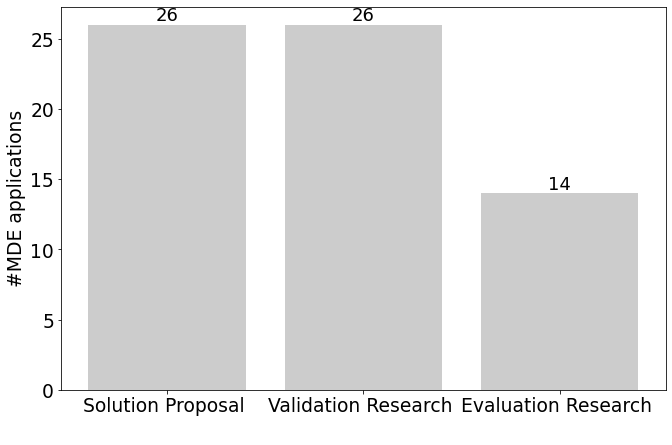

In [19]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figheight*0.8)
plot_data = dataframes[4]
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
entry_data = ["Solution Proposal \n", "Validation Research \n", "Evaluation Research \n"]
axes.bar(entry_data, plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[4])

axes.set_xticklabels(entry_data, rotation=0)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#MDE applications")
plt.tight_layout()
plt.savefig(destination_folder+"TRL_barchart"+ fileformat)
